## 📍 Tópicos de Hoje 📍
<br>

1 [Tipos de Variáveis (Quantitativas e Qualitativas)](#um)

2 [Métricas de Posição (média, mediana e moda)](#dois)

3 [Quartis e Interpretação por BoxPlot](#três)

4 [Identificação de Anomalias (Outliers)](#quatro)

5 [Métricas de Dispersão (amplitude, variância, covariância e desvio padrão)](#cinco)

6 [Correlação](#seis)

7 [Tabela de Frequências (absoluta, relativa e percentual)](#sete)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1) Tipos de Variáveis (Quantitativas e Qualitativas) <a class="anchor" id="um"></a>

Quando coletamos informações, em geral, realizamos uma **amostragem** (tópico de outra aula).

Essas informações vão muito além do que números ou palavras, trazendo consigo características e contextos fundamentais para as nossas futuras análises e modelos.

Cada uma dessas características coletadas (peso, altura, idade, sexo) é chamada de **variável**.

As variáveis podem ser:


!['Imagem'](https://miro.medium.com/max/1400/0*rxxyee4xr8HD1O6N.png)

* **Discreta**: apenas valores inteiros (n° irmãos, filhos, passageiros);
* **Contínuas**: Qualquer valor no intervalo de n° reais (peso, altura, salário);
* **Nominais**: Categorias sem ordem (nome, sexo, cores);
* **Ordinais**: Categorias com ordem (tamanho: P, M, G; classe social: baixa, média, alta; grau de instrução: básico, fundamental, médio, superior).

In [3]:
df_titanic = pd.read_csv('Titanic_data.csv')

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


O conjunto de treinamento tem 891 exemplos e 11 características + a variável de destino (Survived) . 2 dos recursos são floats, 5 são inteiros e 5 são objetos. Abaixo listei os recursos com uma breve descrição:

* survival: Sobrevivente
* PassengerId: ID único de um passageiro
* Pclass: Classe de bilhetes
* Sex: Sexo
* Age: Idade em anos
* Sibsp: Número de irmãos / cônjuges a bordo do Titanic
* Parch: Número de pais / filhos a bordo do Titanic
* Ticket: Numero do bilhete
* Fare: Tarifa de passageiros
* Cabin: Número de cabine
* Embarked: Porto de embarcação

In [5]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


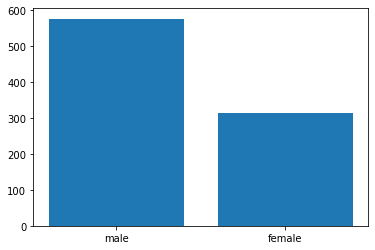

In [10]:
plt.bar(['male', 'female'],[df_titanic[df_titanic['Sex'] =='male'].Sex.count(), df_titanic[df_titanic['Sex'] =='female'].Sex.count()]);

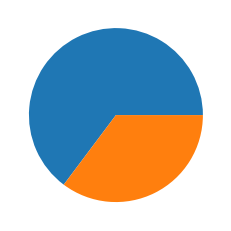

In [21]:
plt.pie([df_titanic[df_titanic['Sex']== 'male'].Sex.count(),df_titanic[df_titanic['Sex']== 'female'].Sex.count()]);

In [25]:
df_titanic[df_titanic['Sex']=='male']['Sex'].count()

577

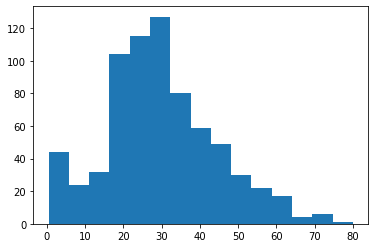

In [28]:
plt.hist(df_titanic['Age'], bins=15);

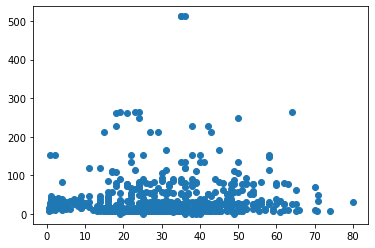

In [15]:
plt.scatter(df_titanic['Age'], df_titanic['Fare']);

<AxesSubplot:>

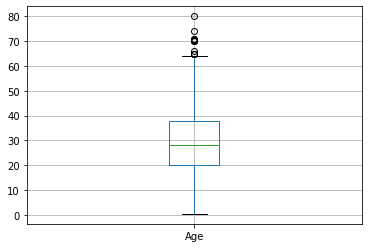

In [18]:
df_titanic.boxplot(column= 'Age')

## 2) Métricas de Posição (média, mediana e moda) <a class="anchor" id="dois"></a>

**Média (mean, average):** Demonstra a concentração dos dados de uma distribuição. É como se fosse o ponto de equilíbrio da distribuição e pode ser calculada por:

!['média'](https://miro.medium.com/max/628/1*U9LeYbNWJt0YERVo4KU61w.png)

In [31]:
media_idade = df_titanic['Age'].mean()
media_idade

29.69911764705882

In [32]:
df_titanic['Age'].sum()/df_titanic['Age'].count()

29.69911764705882

**Moda:** Representa o(s) valores mais comuns dos dados:
* Unimodal: 1 único valor;
* Bimodal: 2 valores;
* Multimodal: Mais de 2 valores como os que mais aparecem;
* Amodal: Não existe moda.


In [33]:
df_titanic['Age'].mode()

0    24.0
Name: Age, dtype: float64

**Mediana**: É o ponto médio, que divide os dados em 50% maiores e 50% maiores do que ele. É também conhecido como o 2°quartil (uma medida separatriz).
* Primeiro quartil (designado por Q1) = quartil inferior = é o valor aos 25% da amostra ordenada = 25º percentil;
* Segundo quartil (designado por Q2) = mediana = é o valor até ao qual se encontra 50% da amostra ordenada = 50º percentil, ou 5º decil;
* Terceiro quartil (designado por Q3) = quartil superior = valor a partir do qual se encontram 25% dos valores mais elevados = valor aos 75% da amostra ordenada = 75º percentil.

In [36]:
df_titanic['Age'].median()

28.0

In [37]:
df_titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## 3) Quartis e Interpretação por BoxPlot <a class="anchor" id="três"></a>

<AxesSubplot:>

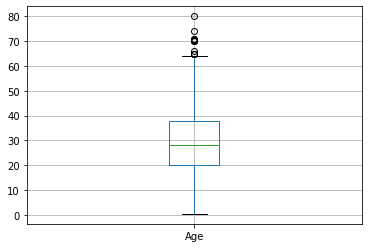

In [38]:
df_titanic.boxplot(column=['Age'])

## 4) Identificação de Anomalias (Outliers) <a class="anchor" id="quatro"></a>

*Outlier* são dados diferentes dos outros pontos que podem causar problemas em procedimentos estatísticos (mudar uma média).

**Exemplo:** Mudar uma idade e ver a média.

* Solução 1: Ordenar os dados para encontrar outliers;
* Solução 2: Utilizar gráficos: dispersão, boxplot;
* Solução 3: Utilizar IQR para encontrar;
* Solução 4: Utilizar o Z-score.


In [40]:
df_titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [43]:
IQR = 38-20.125
lim_sup = 1.5*IQR+38
lim_inf = 20.125 - 1.5*IQR
print(IQR, lim_inf, lim_sup)

17.875 -6.6875 64.8125


## 5) Métricas de Dispersão (amplitude, variância, covariância e desvio padrão <a class="anchor" id="cinco"></a>

**Amplitude**: A diferença entre o maior e o menor valor de um conjunto de dados.

In [45]:
#Amplitude:
amplitude = df_titanic['Age'].max()-df_titanic['Age'].min()
amplitude


79.58

**Amplitude Interquartil:** Diferença entre o 1° e o 3° interquartil.

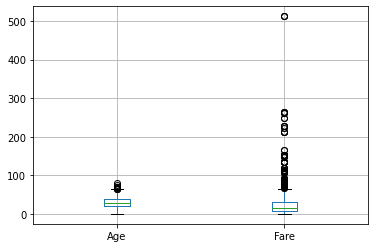

In [51]:
#Boxplot e describe
df_titanic.boxplot(column=['Age','Fare']);

In [50]:
#Encontrando o primeiro quartil (quantile - 0.25)
Q1 = df_titanic['Age'].quantile(0.25)
#Encontrando o terceiro quartil (quantile - 0.75)
Q3 = df_titanic['Age'].quantile(0.75)

IQR = Q3 - Q1
IQR

17.875

**Variância:** Mede o quanto os dados estão dispersos com relação à média. É calculada da seguinte forma:

!['Variância'](https://miro.medium.com/max/996/1*7BEyGiM3JHEEmU2XTB1zZA.png)

In [52]:
df_titanic['Age'].var() #amostral

211.0191247463081

In [54]:
df_titanic['Age'].var(ddof=0) #populacional

210.7235797536662

**Desvio-padrão**: mais utilizado por estar na unidade dos dados. É a raiz quadrada da variância.

!['Desvio-padrão'](https://miro.medium.com/max/1152/1*qPMBPNKhZvuPIBN1BQLV7w.png)


In [53]:
df_titanic['Age'].std()

14.526497332334044

**Coeficiente de variação:** Variabilidade dos dados em relação à média.

**Desvio-padrão** é menor (CV<100%) ou maior (CV>100%) do que a média.

!['Coeficiente de Variação'](https://www.questoesestrategicas.com.br//imgs//?i=lAhgne6HtltF2uKrJPYUvB2i0W7KTGqTYsaFKn3c5BM)


In [55]:
df_titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [56]:
df_titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [58]:
CV1 = df_titanic.Age.std()/df_titanic.Age.mean()
CV1

0.48912218554656756

In [59]:
CV2 = df_titanic.Fare.std()/df_titanic.Fare.mean()
CV2

1.5430725278408517

**Covariância:** A covariância é uma medida estatística onde é possível comparar duas variáveis, permitindo entender como elas se relacionam entre si.

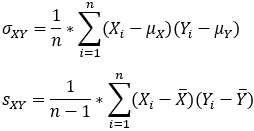

In [60]:
df_titanic.cov()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


## 6) Correlação <a class="anchor" id="seis"></a>

A correlação indica a interdependência entre duas ou mais variáveis.

Em certos casos essa interdependência é clara:

* Massa corporal e altura;
* Consumo de combustível e distância percorrida;
* Número de anúncios e produtos vendidos;
* Tempo de estudo e desempenho na avaliação(nem sempre…rs).
* Mas em muitos casos essa relação não é aparente, e assim devemos recorrer a métodos mais confiáveis de detecção. 

Dentre os métodos mais comuns temos os índices de Pearson, Spearman e Kendall. Vamos falar um pouco sobre esses índices.

### Correlação de Pearson

Também chamado de “coeficiente de correlação produto-momento” ou simplesmente de “ρ de Pearson” mede o grau da correlação (e a direção dessa correlação — se positiva ou negativa) entre duas variáveis. Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.

!['Pearson'](https://miro.medium.com/max/872/1*KWAowigAR0EqWMmSBwOsqg.png)

In [61]:
df_titanic.corr(method='pearson') #por padrao é pearson

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Correlação de Spearman

O coeficiente de correlação de Spearman é indicado para o cálculo da correlação entre variáveis aleatórias x e y relacionadas monotonicamente entre si, mas não necessariamente de maneira linear. Se a relação é linear o método de Pearson é o mais indicado.

!['Spearman'](https://miro.medium.com/max/772/1*QmKUAIDKRmOkoXYYp6dlFw.png)

In [62]:
df_titanic.corr(method='spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


### Correlação de Kendall

É uma medida de correlação de postos, ou seja, verifica a semelhança entre as ordens dos dados quando classificados por cada uma das quantidades. Recebe este nome em homenagem ao estatístico britânico Maurice Kendall, que o desenvolveu em 1938.

A correlação de Kendall leva em consideração apenas a concordância direcional dos chamados pares concordantes e discordantes.

!['Kendall'](https://miro.medium.com/max/1174/1*rPQsIVhiD3izV5sIiewMBg.png)

In [63]:
df_titanic.corr(method='kendall')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.004090,-0.026824,0.027542,-0.048394,0.000798,-0.008921
Survived,-0.004090,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229
Pclass,-0.026824,-0.323533,1.000000,-0.286081,-0.039552,-0.021019,-0.573531
Age,0.027542,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249
SibSp,-0.048394,0.085915,-0.039552,-0.142746,1.000000,0.425241,0.358262
Parch,0.000798,0.133933,-0.021019,-0.200112,0.425241,1.000000,0.330360
Fare,-0.008921,0.266229,-0.573531,0.093249,0.358262,0.330360,1.000000


## 7) Tabela de Frequências (absoluta, relativa e percentual) <a class="anchor" id="sete"></a>

In [64]:
df = df_titanic.Age.dropna()

In [65]:
at = df.max() - df.min()

In [66]:
import math

In [69]:
# calculando a qtd de classes
k = math.sqrt(len(df))

#amplitude de classe
h = at/k
h = math.ceil(h)

In [72]:
frequencias = []
menor = round(df.min(), 1)

menor_amp = round(menor+h, 1)

valor = menor
while valor<df.max():
    frequencias.append('{} - {}'.format(round(valor,1),round(valor+h,1)))
    valor +=h

In [74]:
freq_abs = pd.qcut(df, len(frequencias), labels=frequencias)
print(pd.value_counts(freq_abs).sort_index())

0.4 - 3.4      30
3.4 - 6.4      24
6.4 - 9.4      29
9.4 - 12.4     30
12.4 - 15.4    26
15.4 - 18.4    25
18.4 - 21.4    40
21.4 - 24.4    27
24.4 - 27.4    15
27.4 - 30.4    31
30.4 - 33.4    24
33.4 - 36.4    18
36.4 - 39.4    43
39.4 - 42.4    22
42.4 - 45.4    25
45.4 - 48.4    19
48.4 - 51.4    35
51.4 - 54.4    15
54.4 - 57.4    41
57.4 - 60.4    18
60.4 - 63.4    27
63.4 - 66.4    21
66.4 - 69.4    26
69.4 - 72.4    23
72.4 - 75.4    29
75.4 - 78.4    25
78.4 - 81.4    26
Name: Age, dtype: int64
